# Your work for Part 1 here!
### Remember to organize your work by including your own markdown cells!

## Steps for the project for now...
1. understand the data by reading it + data dictionary
2. conduct surface level EDA (identify outliers, explore features, correlations, visualizations)
3. engineer new features if needed
4. save cleaned dataset with `.to_csv('')`

## part 1 deliverables
- EDA.ipynb
- cleaned dataset

# Step 1, Load Dataset + Surface Level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotx as mpx

In [2]:
df = pd.read_csv('/home/charles/Documents/practice/coding_temple_repo/My-M7-Project-Home-Price-Predictions/data/ameshousing.csv')
cdf = pd.read_csv('cleaned_ameshousing.csv')

In [3]:
    try:
        with open('/home/charles/Documents/practice/coding_temple_repo/My-M7-Project-Home-Price-Predictions/data/DataDocumentation.txt', 'r', encoding='utf-8') as f:
            content = f.read()
            print(content)
    except UnicodeDecodeError:
        print("UTF-8 encoding failed. Trying 'latin-1'...")
        with open('/home/charles/Documents/practice/coding_temple_repo/My-M7-Project-Home-Price-Predictions/data/DataDocumentation.txt', 'r', encoding='latin-1') as f:
            content = f.read()
            print(content)
    except Exception as e:
        print(f"An error occurred: {e}")

UTF-8 encoding failed. Trying 'latin-1'...
NAME: AmesHousing.txt
TYPE: Population
SIZE: 2930 observations, 82 variables
ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessors Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

SOURCES: 
Ames, Iowa Assessors Office 

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
     

## columns of quality 
#### no missing values
- Exter Qual
- Exter Cond
- Heating QC
- KitchenQual
#### missing values
- Bsmt Qual
- Bsmt Cond
- Fireplace Qu
- Garage Qual
- Garage Cond
- Pool QC

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
cdf.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,6,141.0,31770,0,-1.0,1,...,0,-1.0,-1,-1,0,5,2010,0,0,215000
1,1,2,526350040,20,5,80.0,11622,0,-1.0,0,...,0,-1.0,1,-1,0,6,2010,0,0,105000
2,2,3,526351010,20,6,81.0,14267,0,-1.0,1,...,0,-1.0,-1,1,12500,6,2010,0,0,172000
3,3,4,526353030,20,6,93.0,11160,0,-1.0,0,...,0,-1.0,-1,-1,0,4,2010,0,0,244000
4,4,5,527105010,60,6,74.0,13830,0,-1.0,1,...,0,-1.0,1,-1,0,3,2010,0,0,189900


In [5]:
df.shape

(2930, 82)

In [11]:
df.isna().sum().sum()

np.int64(15749)

In [12]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [13]:
df.select_dtypes(include='object').shape[1]

43

# Step 2, Data cleaning

# for quality columns...
       # Ex	Excellent 5
       # Gd	Good 4
       # TA	Typical/Average 3
       # Fa	Fair 2
       # Po	Poor 1
       # NA	None 0

In [ ]:
# For ordinal columns, make them a category column and specify an order, then you can use .cat.codes on it to get a numerical version of it.

# df['Lot Shape'] = pd.Categorical(df['Lot Shape'], categories = ['IR3', 'IR2', 'IR1', 'Reg'], ordered=True)

# Now when I do `df['Lot Shape'].cat.codes`, it returns a series where 0 = IR3, 1 = IR2, etc.

In [ ]:
# df[''] = df[''].replace(to_replace=quality_str, value=quality_dum)

In [ ]:
# df['Bsmt Qual'] = df['Bsmt Qual'].fillna(0.0)

In [ ]:
# for columns of quality...
        # Ex	Excellent 4
        # Gd	Good 3
        # TA	Average/Typical 2
        # Fa	Fair 1
        # Po	Poor 0
        # NaN   None -1

In [9]:
df['Central Air'] = (df['Central Air'] == 'Y').astype(int)

In [10]:
quality_str = ['Ex','Gd','TA','Fa','Po']
quality_dum = [4, 3, 2, 1, 0]

In [11]:
df['Exter Qual'] = df['Exter Qual'].replace(to_replace=quality_str, value=quality_dum)
df['Exter Cond'] = df['Exter Cond'].replace(to_replace=quality_str, value=quality_dum)
df['Heating QC'] = df['Heating QC'].replace(to_replace=quality_str, value=quality_dum)
df['Kitchen Qual'] = df['Kitchen Qual'].replace(to_replace=quality_str, value=quality_dum)
df['Bsmt Qual'] = df['Bsmt Qual'].replace(to_replace=quality_str, value=quality_dum)
df['Bsmt Cond'] = df['Bsmt Cond'].replace(to_replace=quality_str, value=quality_dum)
df['Fireplace Qu'] = df['Fireplace Qu'].replace(to_replace=quality_str, value=quality_dum)
df['Garage Qual'] = df['Garage Qual'].replace(to_replace=quality_str, value=quality_dum)
df['Garage Cond'] = df['Garage Cond'].replace(to_replace=quality_str, value=quality_dum)
df['Pool QC'] = df['Pool QC'].replace(to_replace=quality_str, value=quality_dum)

/tmp/ipykernel_16131/949553053.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exter Qual'] = df['Exter Qual'].replace(to_replace=quality_str, value=quality_dum)
/tmp/ipykernel_16131/949553053.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exter Cond'] = df['Exter Cond'].replace(to_replace=quality_str, value=quality_dum)
/tmp/ipykernel_16131/949553053.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

In [12]:
df['Bsmt Qual'] = df['Bsmt Qual'].fillna(-1)
df['Bsmt Cond'] = df['Bsmt Cond'].fillna(-1)
df['Fireplace Qu'] = df['Fireplace Qu'].fillna(-1)
df['Garage Qual'] = df['Garage Qual'].fillna(-1)
df['Garage Cond'] = df['Garage Cond'].fillna(-1)
df['Pool QC'] = df['Pool QC'].fillna(-1)

In [13]:
zoning_val = ['A (agr)','C (all)','FV','I (all)','RH','RL','RP','RM']
zoning_dum = [1, 2, 3, 4, 5, 6, 7, 8]
street_val = ['Grvl','Pave']
street_dum = [1, 0]
garage_val = ['Fin', 'Unf', 'RFn']
garage_dum = [2, 0, 1]
bldg_val = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
bldg_dum =[0,3,4,2,1]

In [14]:
df['MS Zoning'] = df['MS Zoning'].replace(to_replace=zoning_val, value=zoning_dum)
df['Street'] = df['Street'].replace(to_replace=street_val, value=street_dum)
df['Alley'] = df['Alley'].replace(to_replace=street_val, value=street_dum)
df['Garage Finish'] = df['Garage Finish'].replace(to_replace=garage_val, value=garage_dum)
df['Bldg Type'] = df['Bldg Type'].replace(to_replace=bldg_val, value=bldg_dum)

/tmp/ipykernel_16131/3464866272.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MS Zoning'] = df['MS Zoning'].replace(to_replace=zoning_val, value=zoning_dum)
/tmp/ipykernel_16131/3464866272.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Street'] = df['Street'].replace(to_replace=street_val, value=street_dum)
/tmp/ipykernel_16131/3464866272.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [16]:
df['Lot Shape'] = df['Lot Shape'].replace({'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3})
df['Land Contour'] = df['Land Contour'].replace({'Lvl' : 0, 'Bnk' : 1, 'HLS' : 2, 'Low' : 3})
df['Utilities'] = df['Utilities'].replace({'AllPub' : 0, 'NoSewr' : 1, 'NoSeWa' : 2})
df['Lot Config'] = df['Lot Config'].replace({'Inside' : 0, 'Corner' : 1, 'CulDSac' : 2, 'FR2' : 3, 'FR3' : 4})
df['Land Slope'] = df['Land Slope'].replace({'Gtl' : 0, 'Mod' : 1, 'Sev' : 2})

/tmp/ipykernel_16131/252755335.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lot Shape'] = df['Lot Shape'].replace({'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3})
/tmp/ipykernel_16131/252755335.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Land Contour'] = df['Land Contour'].replace({'Lvl' : 0, 'Bnk' : 1, 'HLS' : 2, 'Low' : 3})
/tmp/ipykernel_16131/252755335.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

In [17]:
df['Neighborhood'] = pd.Categorical(df['Neighborhood'], categories = ['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
        'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], ordered=True)
df['Condition 1'] = pd.Categorical(df['Condition 1'], categories= ['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'RRAn',
       'RRNn'], ordered= True)
df['Condition 2'] = pd.Categorical(df['Condition 2'], categories= ['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAe', 'RRAn'], ordered= True)
df['House Style'] = pd.Categorical(df['House Style'], categories=['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], ordered= True)
df['Roof Style'] = pd.Categorical(df['Roof Style'], categories=['Hip', 'Gable', 'Mansard', 'Gambrel', 'Shed', 'Flat'], ordered= True)
df['Roof Matl'] = pd.Categorical(df['Roof Matl'], categories=['CompShg', 'WdShake', 'Tar&Grv', 'WdShngl', 'Membran', 'ClyTile',
       'Roll', 'Metal'], ordered= True)
df['Exterior 1st'] = pd.Categorical(df['Exterior 1st'], categories=['BrkFace', 'VinylSd', 'Wd Sdng', 'CemntBd', 'HdBoard', 'Plywood',
       'MetalSd', 'AsbShng', 'WdShing', 'Stucco', 'AsphShn', 'BrkComm',
       'CBlock', 'PreCast', 'Stone', 'ImStucc'], ordered= True)
df['Exterior 2nd'] = pd.Categorical(df['Exterior 2nd'], categories=['Plywood', 'VinylSd', 'Wd Sdng', 'BrkFace', 'CmentBd', 'HdBoard',
       'Wd Shng', 'MetalSd', 'ImStucc', 'Brk Cmn', 'AsbShng', 'Stucco',
       'AsphShn', 'CBlock', 'Stone', 'PreCast', 'Other'], ordered= True)
df['Mas Vnr Type'] = pd.Categorical(df['Mas Vnr Type'], categories=['Stone', 'NaN', 'BrkFace', 'BrkCmn', 'CBlock'], ordered= True) # change the array for categories on this one
df['Foundation'] = pd.Categorical(df['Foundation'], categories=['CBlock', 'PConc', 'Wood', 'BrkTil', 'Slab', 'Stone'], ordered= True)
df['Bsmt Exposure'] = pd.Categorical(df['Bsmt Exposure'], categories=['Gd', 'No', 'Mn', 'Av', 'NaN'], ordered = True)
df['BsmtFin Type 1'] = pd.Categorical(df['BsmtFin Type 1'], categories=['BLQ', 'Rec', 'ALQ', 'GLQ', 'Unf', 'LwQ', 'NaN'], ordered = True)
df['BsmtFin Type 2'] = pd.Categorical(df['BsmtFin Type 2'], categories=['BLQ', 'Rec', 'ALQ', 'GLQ', 'Unf', 'LwQ', 'NaN'], ordered = True)
df['Heating'] = pd.Categorical(df['Heating'], categories=['GasA', 'GasW', 'Grav', 'Wall', 'Floor', 'OthW'], ordered = True)
df['Electrical'] = pd.Categorical(df['Electrical'], categories=['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'NaN', 'Mix'], ordered = True)
df['Functional'] = pd.Categorical(df['Functional'], categories=['Typ', 'Mod', 'Min1', 'Min2', 'Maj1', 'Maj2', 'Sev', 'Sal'], ordered = True)
df['Garage Type'] = pd.Categorical(df['Garage Type'], categories=['Attchd', 'BuiltIn', 'Basment', 'Detchd', 'NaN', 'CarPort', '2Types'], ordered = True)
df['Paved Drive'] = pd.Categorical(df['Paved Drive'], categories=['P', 'Y', 'N'], ordered = True)
df['Fence'] = pd.Categorical(df['Fence'], categories=['NaN', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], ordered = True)
df['Misc Feature'] = pd.Categorical(df['Misc Feature'], categories=['NaN', 'Gar2', 'Shed', 'Othr', 'Elev', 'TenC'], ordered = True)
df['Sale Type'] = pd.Categorical(df['Sale Type'], categories=['WD ', 'New', 'COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw',
       'CWD', 'VWD'], ordered = True)
df['Sale Condition'] = pd.Categorical(df['Sale Condition'], categories=['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'], ordered = True)


In [18]:
df['Neighborhood'] = df['Neighborhood'].cat.codes
df['Condition 1'] = df['Condition 1'].cat.codes
df['Condition 2'] = df['Condition 2'].cat.codes
df['House Style'] = df['House Style'].cat.codes
df['Roof Style'] = df['Roof Style'].cat.codes
df['Roof Matl'] = df['Roof Matl'].cat.codes
df['Exterior 1st'] = df['Exterior 1st'].cat.codes
df['Exterior 2nd'] = df['Exterior 2nd'].cat.codes
df['Mas Vnr Type'] = df['Mas Vnr Type'].cat.codes
df['Foundation'] = df['Foundation'].cat.codes
df['Bsmt Exposure'] = df['Bsmt Exposure'].cat.codes
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].cat.codes
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].cat.codes
df['Heating'] = df['Heating'].cat.codes
df['Electrical'] = df['Electrical'].cat.codes
df['Functional'] = df['Functional'].cat.codes
df['Garage Type'] = df['Garage Type'].cat.codes
df['Paved Drive'] = df['Paved Drive'].cat.codes
df['Fence'] = df['Fence'].cat.codes
df['Misc Feature'] = df['Misc Feature'].cat.codes
df['Sale Type'] = df['Sale Type'].cat.codes
df['Sale Condition'] = df['Sale Condition'].cat.codes


In [48]:
df['Neighborhood'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int8)

In [26]:
df['Condition 1'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [27]:
df['Condition 2'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [28]:
df['House Style'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [29]:
df['Roof Style'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [30]:
df['Roof Matl'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [31]:
df['Exterior 1st'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int8)

In [32]:
df['Exterior 2nd'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int8)

In [33]:
df['Mas Vnr Type'].unique()

# this one is slightly tricky keep it in mind

array([ 0, -1,  2,  3,  4], dtype=int8)

In [34]:
df['Foundation'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [35]:
df['Bsmt Exposure'].unique()

array([ 0,  1,  2,  3, -1], dtype=int8)

In [36]:
df['BsmtFin Type 1'].unique()

array([ 0,  1,  2,  3,  4,  5, -1], dtype=int8)

In [37]:
df['BsmtFin Type 2'].unique()

array([ 4,  5,  0,  1, -1,  3,  2], dtype=int8)

In [38]:
df['Heating'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [39]:
df['Electrical'].unique()

array([ 0,  1,  2,  3, -1,  5], dtype=int8)

In [40]:
df['Functional'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [41]:
df['Garage Type'].unique()

array([ 0,  1,  2,  3, -1,  5,  6], dtype=int8)

In [42]:
df['Garage Finish'].unique()

array([ 2.,  0.,  1., -1.])

In [43]:
df['Paved Drive'].unique()

array([0, 1, 2], dtype=int8)

In [44]:
df['Fence'].unique()

array([-1,  1,  2,  3,  4], dtype=int8)

In [45]:
df['Misc Feature'].unique()

array([-1,  1,  2,  3,  4,  5], dtype=int8)

In [46]:
df['Sale Type'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [47]:
df['Sale Condition'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

<Axes: >

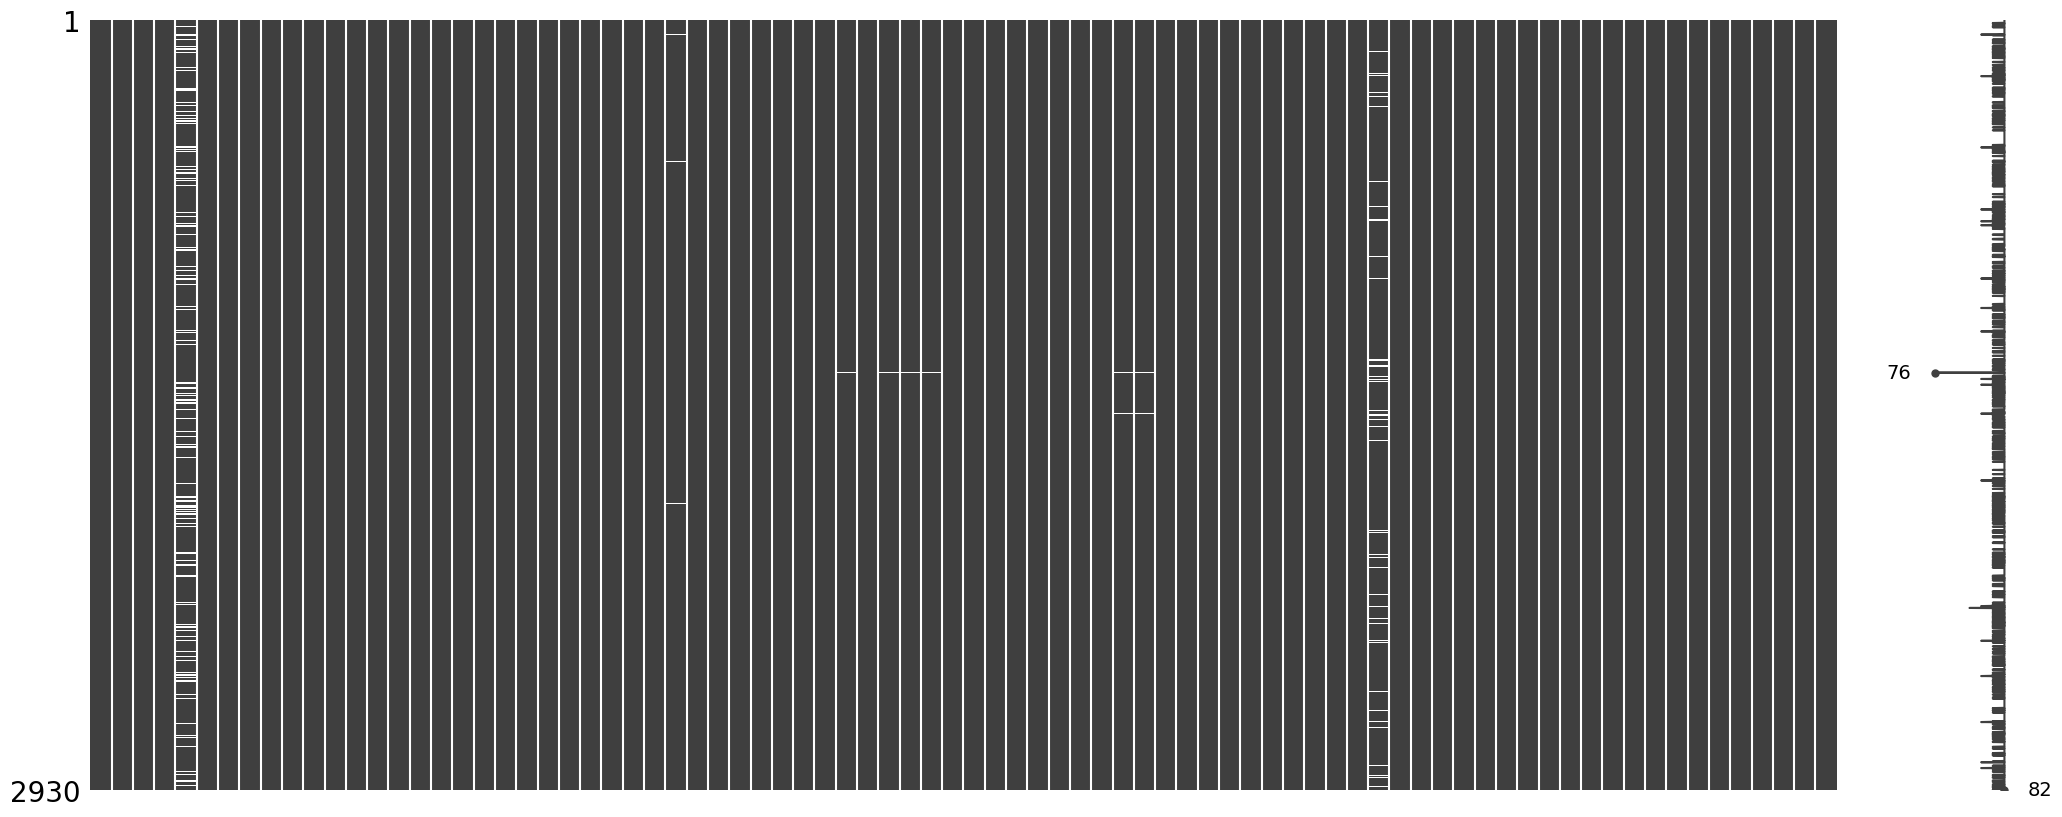

In [52]:
msno.matrix(df)

In [57]:
df.corr()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,1.000000,0.173593,0.011797,0.056190,-0.007034,0.031354,-0.005111,0.013321,0.012841,0.052312,-0.017753,-0.015522,0.018356,0.173412,-0.007952,-0.001297,-0.019643,0.047724,-0.048500,-0.011054,-0.052319,-0.075566,0.022265,0.031610,0.014988,0.000521,-0.010474,-0.030907,-0.054893,-0.008756,0.017826,-0.038985,0.002468,0.033437,0.005603,-0.032321,0.006634,-0.002773,0.005780,-0.028719,-0.002474,-0.018056,-0.027872,0.054808,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,-0.051655,0.002612,0.023437,-0.019156,-0.019077,0.033716,-0.051160,-0.048315,-0.036185,-0.035435,-0.032058,-0.026853,0.017777,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,0.043253,-0.005641,-0.034109,-0.006083,0.133365,-0.975993,0.015000,0.079306,-0.031408
PID,0.173593,1.000000,-0.001281,0.334003,-0.096918,0.034868,0.055806,0.122938,-0.102516,0.164469,0.016553,-0.047537,0.132867,0.836977,-0.070912,0.002235,-0.104822,0.171574,-0.263147,0.104451,-0.343388,-0.157111,0.126170,0.022342,0.069245,0.030802,-0.213752,-0.229283,-0.224555,0.039803,0.231110,-0.186376,-0.092132,0.028250,0.012567,-0.098375,-0.030527,-0.001145,-0.087707,-0.189642,0.055611,-0.091547,-0.196057,0.141848,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.202310,-0.068981,0.088916,-0.108056,-0.150197,0.190421,-0.256829,-0.277165,-0.237484,-0.210606,-0.184909,-0.176957,0.116061,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.001790,0.035011,-0.008848,-0.008260,-0.050455,0.009579,-0.003207,0.050419,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,0.075776,-0.420135,-0.204613,-0.002338,0.106177,-0.070130,-0.025307,-0.024700,-0.015122,-0.026921,0.052976,-0.024528,0.022833,0.768284,0.334329,0.039419,-0.067349,0.036579,0.043397,0.087023,-0.015073,0.072527,0.127435,0.002751,0.002730,0.016993,-0.055188,0.044443,0.066105,-0.009095,0.048255,0.088918,-0.060075,0.050164,-0.070946,-0.130421,-0.219445,0.033539,-0.017515,-0.077453,-0.005084,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,-0.017040,0.031898,-0.012805,-0.049955,-0.049745,0.078455,0.088754,-0.030654,-0.045883,-0.103239,-0.093650,-0.110416,0.037518,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.009450,-0.104096,-0.040167,-0.029254,0.000350,-0.017905,-0.006896,-0.000683,-0.085092
MS Zoning,0.056190,0.334003,0.075776,1.000000,-0.165863,-0.076387,-0.094824,0.117767,-0.112901,-0.002650,-0.017164,-0.038514,0.007992,0.248162,0.062729,0.038823,0.031634,0.133712,-0.181780,0.196430,-0.351682,-0.202124,0.017411,-0.008183,0.065631,0.092890,-0.053781,-0.072034,-0.222087,0.104272,0.116385,-0.176650,-0.028081,-0.063593,0.001372,-0.077782,0.007856,-0.001841,-0.054708,-0.135701,0.029219,-0.161047,-0.050367,0.096105,-0.127366,-0.000713,0.034190,-0.096211,-0.060430,0.025032,-0.208621,-0.126016,-0.002875,0.053341,-0.186484,-0.032019,0.042877,-0.066329,-0.083800,0.174075,-0.305928,-0.190632,-0.174561,-0.194524,-0.093206,-0.077432,0.046829,-0.039633,-0.169785,

In [61]:
subset1 = df.dropna()

In [69]:
subset1.shape

(2274, 82)

In [64]:
subset1.corr()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,1.000000,0.186851,0.003437,0.066378,0.000827,0.027334,-0.025686,0.031408,0.011691,0.040369,-0.012826,-0.023559,0.003704,0.177058,0.006045,-0.011096,-0.041739,0.059770,-0.061958,-0.001208,-0.069052,-0.083949,0.013422,0.014127,0.018816,-0.001151,0.008118,-0.031684,-0.067087,0.000420,0.014905,-0.047924,0.012488,0.047003,0.007082,-0.036324,0.019260,-0.018241,0.004813,-0.039808,0.001255,-0.004871,-0.030718,0.059798,-0.023203,0.024821,-0.010944,0.001731,-0.038750,0.019692,-0.048090,-0.025762,0.036307,-0.012595,-0.064103,0.015391,0.036907,-0.014002,-0.013839,0.045035,-0.067405,-0.035648,-0.039972,-0.040999,-0.050380,-0.038801,0.010570,-0.007764,0.016409,0.030234,-0.024027,0.014948,0.051007,0.041477,-0.010889,-0.014504,-0.006522,0.144642,-0.976588,0.033225,0.078351,-0.042863
PID,0.186851,1.000000,-0.039260,0.354577,-0.083052,0.018227,0.048392,0.120828,-0.077859,0.148429,0.022550,-0.034800,0.119124,0.844050,-0.052093,0.010535,-0.152384,0.180726,-0.269175,0.144920,-0.343519,-0.154874,0.135493,-0.015322,0.067936,0.028988,-0.241191,-0.252567,-0.229091,0.058872,0.238380,-0.191484,-0.074953,0.020340,0.016668,-0.102546,-0.011610,-0.009075,-0.092588,-0.202053,0.058985,-0.093410,-0.189832,0.132156,-0.165258,0.019002,0.044313,-0.110324,-0.057494,-0.000180,-0.181238,-0.144932,0.009781,0.057641,-0.208096,-0.066088,0.085187,-0.102781,-0.142032,0.273724,-0.281763,-0.252377,-0.208763,-0.186888,-0.147526,-0.122773,0.077620,-0.066399,-0.066659,0.164402,-0.022363,-0.032536,-0.010580,-0.006656,0.039640,0.001887,0.005222,-0.048610,-0.007014,-0.010799,0.025522,-0.251085
MS SubClass,0.003437,-0.039260,1.000000,0.077297,-0.423000,-0.256170,-0.024995,0.104964,-0.034992,-0.031355,-0.013172,0.001338,-0.024443,0.028561,-0.018717,0.027004,0.783169,0.327594,0.052085,-0.079032,0.049615,0.034348,0.085701,-0.030518,0.090285,0.145372,0.014646,0.012805,0.022079,-0.034136,0.037688,0.072269,0.008111,0.027616,0.066557,-0.062850,0.055251,-0.059902,-0.134411,-0.221142,0.047863,-0.028081,-0.051880,-0.024179,-0.249830,0.314479,0.010410,0.069607,0.004894,0.006263,0.129155,0.199614,-0.042464,0.229458,-0.011290,0.019250,0.006682,-0.028799,-0.028915,0.132976,0.066391,-0.016208,-0.009893,-0.077798,0.016713,-0.036779,-0.007801,-0.020644,-0.007949,-0.028739,-0.030243,-0.052162,-0.007481,-0.013167,-0.082872,-0.050253,-0.041543,-0.001424,-0.019573,0.005626,-0.014476,-0.079791
MS Zoning,0.066378,0.354577,0.077297,1.000000,-0.154704,-0.085844,-0.115009,0.101231,-0.102141,-0.000508,-0.040599,-0.021440,0.014325,0.254908,0.065817,0.054724,0.020528,0.152736,-0.205693,0.200132,-0.384556,-0.233108,0.038685,-0.003397,0.085188,0.111968,-0.062612,-0.062323,-0.250582,0.119345,0.118674,-0.196245,-0.021677,-0.089490,-0.003881,-0.081336,0.013106,0.000579,-0.058828,-0.142864,0.004481,-0.193316,-0.078012,0.107141,-0.131466,0.011843,0.048018,-0.089426,-0.072790,0.035779,-0.224097,-0.119466,0.016336,0.073128,-0.211307,-0.026091,0.048758,-0.063341,-0.084235,0.237425,-0.321076,-0.216097,-0.189532,-0.213818,-0.119023,-0.076999,0.048154,-0.057516,-0.184455,0.156320,-0

In [66]:
subset1.to_csv('cleaned_ameshousing.csv')

In [ ]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):

In [9]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    plt.figure(figsize = (8, 8))
    sns.histplot(cdf.loc[cdf['SalePrice'] <= 700000], x = 'SalePrice', bins = 25)
    plt.xticks(rotation = 75)
    plt.title('Distribution of Sale Price')
    plt.ylabel('Number of Occurunces')
    plt.xlabel('Sale Price of House (In USD)')
    plt.savefig('Distribution_of_Sale_Price.png')

In [3]:
low_quartile_lot = cdf['Lot Area'].quantile(0.25)
up_quartile_lot = cdf['Lot Area'].quantile(0.75)
inner_range_lot = up_quartile_lot - low_quartile_lot
lower_bound_lot = low_quartile_lot - 1.5 * inner_range_lot
upper_bound_lot = up_quartile_lot + 1.5 * inner_range_lot

low_quartile_price = cdf['SalePrice'].quantile(0.25)
up_quartile_price = cdf['SalePrice'].quantile(0.75)
inner_range_price = up_quartile_price - low_quartile_price
lower_bound_price = low_quartile_price - 1.5 * inner_range_price
upper_bound_price = up_quartile_price + 1.5 * inner_range_price

low_quartile_garage = cdf['Garage Area'].quantile(0.25)
up_quartile_garage = cdf['Garage Area'].quantile(0.75)
inner_range_garage = up_quartile_garage - low_quartile_garage
lower_bound_garage = low_quartile_garage - 1.5 * inner_range_garage
upper_bound_garage = up_quartile_garage + 1.5 * inner_range_garage


In [20]:
price_by_lot = cdf[(cdf['SalePrice'] >= lower_bound_price) & (cdf['SalePrice'] <= upper_bound_price) & (cdf['Lot Area'] >= lower_bound_lot) & (cdf['Lot Area'] <= upper_bound_lot)]

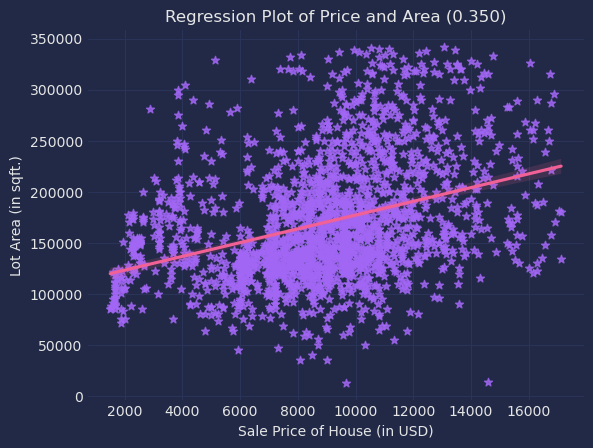

In [180]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    sns.regplot(data = price_by_lot, y = 'SalePrice', x = 'Lot Area',line_kws={'color' : '#f26196'} ,marker= '*')
    plt.title('Regression Plot of Price and Area (0.350)')
    plt.ylabel('Lot Area (in sqft.)')
    plt.xlabel('Sale Price of House (in USD)')
    plt.savefig('Regression_Plot_of_Price_and_Area_(0.350).png')

    # 0.349918 corr coef of price and lot area cleaned

In [ ]:
cdf.corr()

In [10]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    plt.figure(figsize=(8,20))
    sns.heatmap(cdf.corr(numeric_only= True)[['SalePrice']].sort_values(by = 'SalePrice', ascending= False), 
           annot = True, 
           vmin= -1, 
           vmax = 1, 
           cmap = 'coolwarm')
    plt.title('Correlation Coefficients of Target and Features')
    plt.xlabel('Sale Price or Target')
    plt.ylabel('Independent Variables or Features')
    plt.savefig('Correlation_Coefficients_of_Target_and_Features.png')

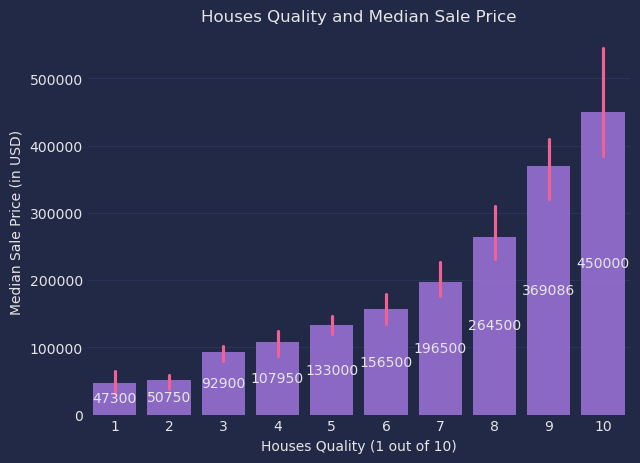

In [198]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    fig, ax = plt.subplots(figsize = (7, 5))
    sns.barplot(cdf, x= 'Overall Qual', y='SalePrice', estimator='median', errorbar =('pi', 50),err_kws={'color' : '#f26196'}, alpha = 0.8)
    ax.bar_label(ax.containers[0], label_type='center')
    plt.title('Houses Quality and Median Sale Price')
    plt.xlabel('Houses Quality (1 out of 10)')
    plt.ylabel('Median Sale Price (in USD)')
    plt.savefig('Houses_Quality_and_Median_Sale_Price.png')

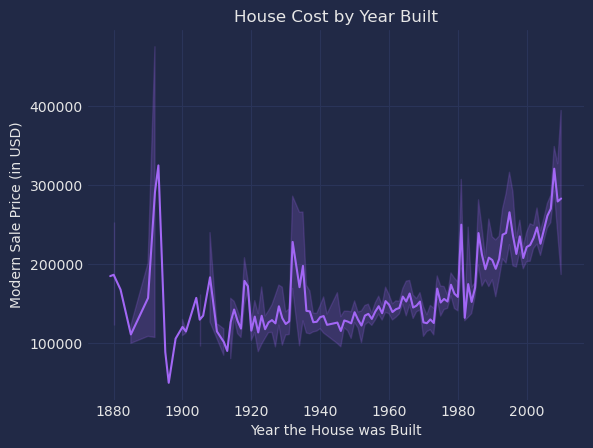

In [177]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    sns.lineplot(cdf, x = 'Year Built', y ='SalePrice',)
    plt.title('House Cost by Year Built')
    plt.xlabel('Year the House was Built')
    plt.ylabel('Modern Sale Price (in USD)')

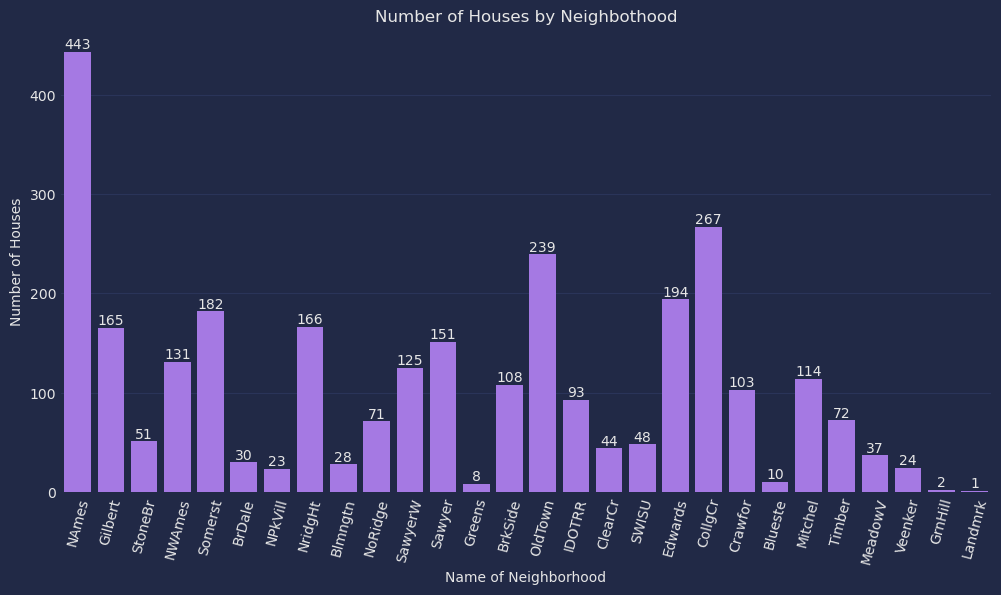

In [151]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.countplot(df, x = 'Neighborhood')
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation = 75)
    plt.title('Number of Houses by Neighbothood')
    plt.xlabel('Name of Neighborhood')
    plt.ylabel('Number of Houses')

/tmp/ipykernel_16131/1173165564.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Attached','Built-In','Basement','Detached','No Garage','Car-Port','Two-Type'])


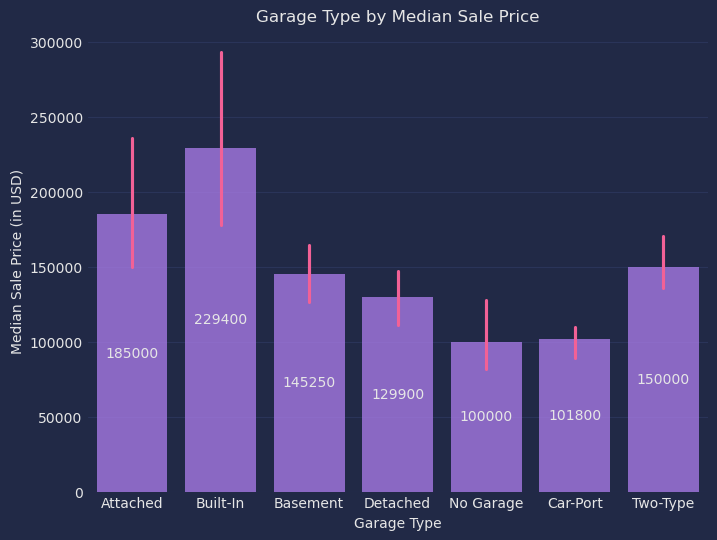

In [199]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.barplot(df, x= df['Garage Type'].fillna('No Garage'), y='SalePrice', estimator='median', errorbar =('pi', 50),err_kws={'color' : '#f26196'} ,alpha = 0.8)
    ax.bar_label(ax.containers[0], label_type='center')
    ax.set_xticklabels(['Attached','Built-In','Basement','Detached','No Garage','Car-Port','Two-Type'])
    plt.title('Garage Type by Median Sale Price')
    plt.xlabel('Garage Type')
    plt.ylabel('Median Sale Price (in USD)')
    plt.savefig('Garage_Type_by_Median_Sale_Price.png')    
    # err_kws={'color' : '#f26196'}

In [ ]:
       # 2Types	More than one type of garage
       # Attchd	Attached to home
       # Basment	Basement Garage
       # BuiltIn	Built-In (Garage part of house - typically has room above garage)
       # CarPort	Car Port
       # Detchd	Detached from home
       # NA	No Garage

In [4]:
price_by_garage = cdf[(cdf['SalePrice'] >= lower_bound_price) & (cdf['SalePrice'] <= upper_bound_price) & (cdf['Garage Area'] >= lower_bound_garage) & (cdf['Garage Area'] <= upper_bound_garage)]

In [6]:
with plt.style.context(mpx.styles.pitaya_smoothie['dark']):
    sns.regplot(data = price_by_garage, y = 'Garage Area', x = 'SalePrice', line_kws={'color' : '#f26196'} ,marker= '*')
    plt.title('Regression Plot of Price and Area (0.614)')
    plt.ylabel('Garage Area (in sqft.)')
    plt.xlabel('Sale Price of House (in USD)')
    plt.savefig('Regression_Plot_of_Price_and_Area_(0.614).png')
    # 0.613790 corr coef for cleaned sale price + garage

In [ ]:
# line_kws={'color' : '#f26196'} 